In [ ]:
import healpy as hp
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from scipy.stats import gaussian_kde

In [49]:
# GRB250702D
filename = 'GRB250702D.fit'
map_data = hp.read_map(filename, verbose=False)

# Get indices of HEALPix pixels
nside = hp.get_nside(map_data)
indices = np.arange(len(map_data))

# Convert indices to RA and Dec
theta, phi = hp.pix2ang(nside, indices)
alpha = phi
sindel = np.sin(0.5 * np.pi - theta)

# Normalize probabilities (for KDE weights)
probabilities = map_data / np.sum(map_data)

# Create a 2D Gaussian KDE
coords = np.vstack([alpha, sindel])
kde_GRB250702D = gaussian_kde(coords, weights=probabilities)

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_90217/2177503896.py:3: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  map_data = hp.read_map(filename, verbose=False)


In [50]:
# GRB250702B
filename = 'GRB250702B.fit'
map_data = hp.read_map(filename, verbose=False)

# Get indices of HEALPix pixels
nside = hp.get_nside(map_data)
indices = np.arange(len(map_data))

# Convert indices to RA and Dec
theta, phi = hp.pix2ang(nside, indices)
alpha = phi
sindel = np.sin(0.5 * np.pi - theta)

# Normalize probabilities (for KDE weights)
probabilities = map_data / np.sum(map_data)

# Create a 2D Gaussian KDE
coords = np.vstack([alpha, sindel])
kde_GRB250702B = gaussian_kde(coords, weights=probabilities)

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_90217/1635433044.py:3: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  map_data = hp.read_map(filename, verbose=False)


In [51]:
# GRB250702B
filename = 'GRB250702E.fit'
map_data = hp.read_map(filename, verbose=False)

# Get indices of HEALPix pixels
nside = hp.get_nside(map_data)
indices = np.arange(len(map_data))

# Convert indices to RA and Dec
theta, phi = hp.pix2ang(nside, indices)
alpha = phi
sindel = np.sin(0.5 * np.pi - theta)

# Normalize probabilities (for KDE weights)
probabilities = map_data / np.sum(map_data)

# Create a 2D Gaussian KDE
coords = np.vstack([alpha, sindel])
kde_GRB250702E = gaussian_kde(coords, weights=probabilities)

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_90217/133605001.py:3: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  map_data = hp.read_map(filename, verbose=False)


In [ ]:
alpha = np.linspace(0, 2 * np.pi, 100)  # RA in radians
sindel = np.linspace(-1, 1, 100)  # sin(Dec) from -1 to 1
# Generate a grid for evaluation
ra_grid, dec_grid = np.mgrid[0:2 * np.pi:100j, -1:1:100j]  # RA in radians, Dec in sine of declination
grid_coords = np.vstack([ra_grid.ravel(), dec_grid.ravel()])

# Evaluate KDE on the grid
density_GRB250702D = kde_GRB250702D(grid_coords).reshape(ra_grid.shape)
density_GRB250702B = kde_GRB250702B(grid_coords).reshape(ra_grid.shape)
density_GRB250702E = kde_GRB250702E(grid_coords).reshape(ra_grid.shape)

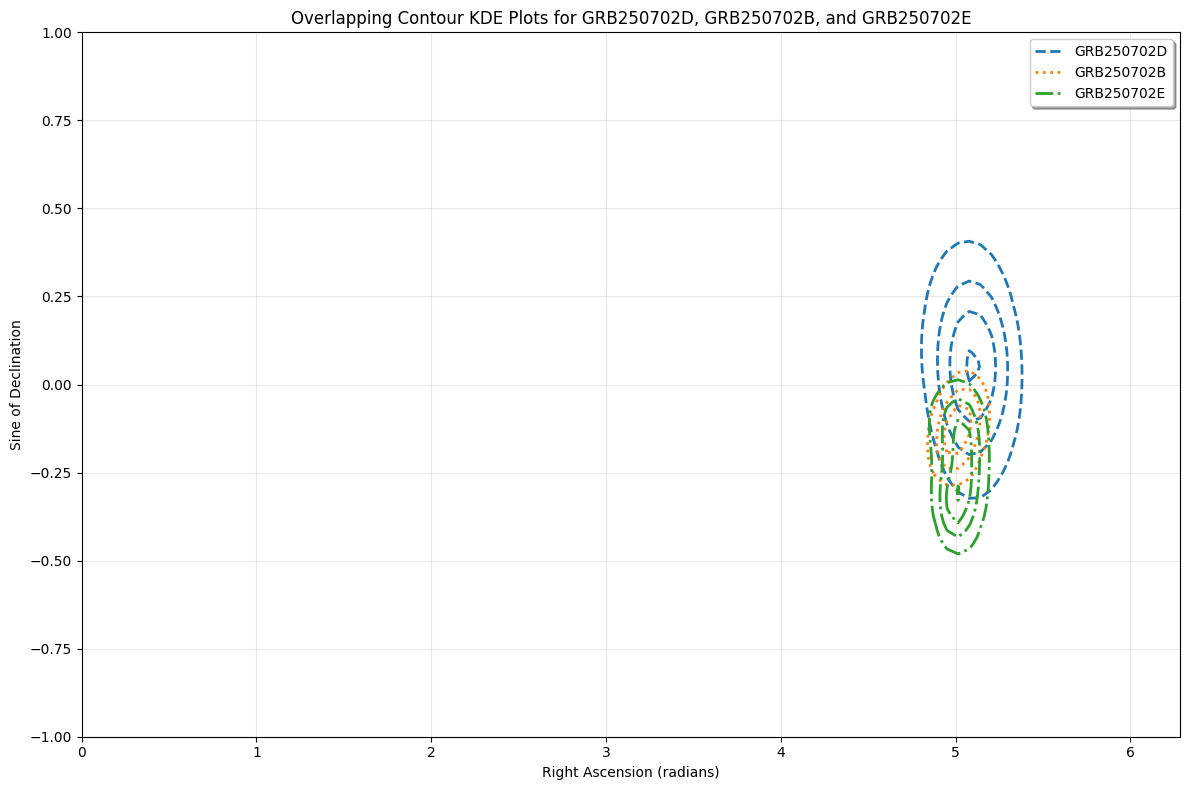

In [62]:
# Plot the overlapping contour KDE plots for GRB250702D, GRB250702B, and GRB250702E in the same figure
plt.figure(figsize=(12, 8))
contour1 = plt.contour(ra_grid, dec_grid, density_GRB250702D, levels=4, colors='C0', linewidths=2, linestyles='dashed')
contour2 = plt.contour(ra_grid, dec_grid, density_GRB250702B, levels=4, colors='C1', linewidths=2, linestyles='dotted')
contour3 = plt.contour(ra_grid, dec_grid, density_GRB250702E, levels=4, colors='C2', linewidths=2, linestyles='dashdot')

# Create legend with manual entries
plt.plot([], [], color='C0', linestyle='dashed', linewidth=2, label='GRB250702D')
plt.plot([], [], color='C1', linestyle='dotted', linewidth=2, label='GRB250702B')
plt.plot([], [], color='C2', linestyle='dashdot', linewidth=2, label='GRB250702E')

plt.xlabel('Right Ascension (radians)')
plt.ylabel('Sine of Declination')
plt.title('Overlapping Contour KDE Plots for GRB250702D, GRB250702B, and GRB250702E')
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [68]:
## calculate bayes factor sky
## use monte carlo integration
# BF = 4*np.pi * np.average( density_GRB250702D(alpha, sindel) * density_GRB250702B(alpha, sindel) * density_GRB250702E(alpha, sindel) )

num_samples = 10000
alpha = np.random.uniform(0, 2 * np.pi, num_samples)  # RA in radians
sindel = np.random.uniform(-1, 1, num_samples)  # sin(Dec) from -1 to 1
# Generate a grid for evaluation
input = np.vstack([alpha, sindel])

# monte carlo integration
BF = 4*np.pi * np.average( kde_GRB250702D(input) * kde_GRB250702B(input) * kde_GRB250702E(input) )
print(f"Bayes Factor: {BF}")


Bayes Factor: 11.980323154855522
